<a href="https://colab.research.google.com/github/sarthakpant772/MLnow_2.0/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/mashine learning classroom/linear regressing model/dataset


/content/drive/MyDrive/mashine learning classroom/linear regressing model/dataset


In [3]:
ls

cleanedMathData.csv  student-merge.R  univarit_MathData_2.csv
student-mat.csv      student-por.csv
student-mat.gsheet   student.txt


In [4]:
import os


In [5]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [6]:
mathData = pd.read_csv('student-mat.csv', sep=';') #load the csv file as dataframe

In [7]:


mathData.head(10) #print the first ten rows of the dataframe



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


we are going to consider only `G1` and `g3`



In [8]:
uniMathData = mathData[['G1', 'G3']]
uniMathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [9]:
uniMathData.to_csv('univarit_MathData_2.csv')

In [10]:
ls

cleanedMathData.csv  student-merge.R  univarit_MathData_2.csv
student-mat.csv      student-por.csv
student-mat.gsheet   student.txt


## data visualization


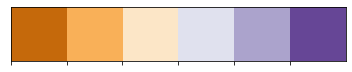

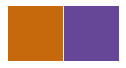

In [11]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [12]:
uniMathData.columns

Index(['G1', 'G3'], dtype='object')

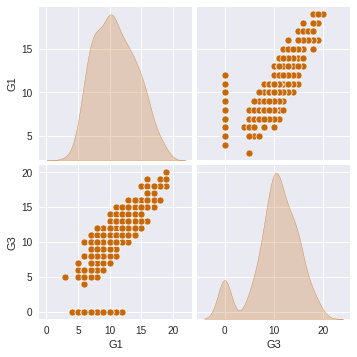

In [13]:
sns.pairplot(uniMathData,
             x_vars=['G1','G3'],
             y_vars=['G1','G3'],
             diag_kind='kde'
             )

##Data split

In [14]:
trainDataset=uniMathData.sample(frac=0.8,random_state=0)
testDataset=uniMathData.drop(trainDataset.index)
print(trainDataset.head())
print(testDataset.head())


     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [15]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [16]:
trainFeature=trainDataset.copy()
testFeature=testDataset.copy()

In [17]:
trainLables=trainFeature.pop('G3')
testLables=testFeature.pop('G3')
print(trainFeature.head())
print(testFeature.head())



     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [18]:
print(trainLables.head())
print(testLables.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [19]:
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(1)
                           ])

In [20]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [23]:
numEpochs = 5000
history = model.fit(x = trainFeature, y = trainLables, validation_data = (testFeature, testLables),
                epochs = numEpochs)


Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
10/10 [==============================] - 0s 7ms/step - loss: 1.8327 - mae: 1.8327 - mse: 8.2818 - val_loss: 1.5950 - val_mae: 1.5950 - val_mse: 6.1507
Epoch 2502/5000
10/10 [==============================] - 0s 5ms/step - loss: 1.8326 - mae: 1.8326 - mse: 8.2810 - val_loss: 1.5949 - val_mae: 1.5949 - val_mse: 6.1513
Epoch 2503/5000
10/10 [==============================] - 0s 5ms/step - loss: 1.8324 - mae: 1.8324 - mse: 8.2818 - val_loss: 1.5950 - val_mae: 1.5950 - val_mse: 6.1495
Epoch 2504/5000
10/10 [==============================] - 0s 6ms/step - loss: 1.8327 - mae: 1.8327 - mse: 8.2816 - val_loss: 1.5955 - val_mae: 1.5955 - val_mse: 6.1536
Epoch 2505/5000
10/10 [==============================] - 0s 5ms/step - loss: 1.8326 - mae: 1.8326 - mse: 8.2821 - val_loss: 1.5949 - val_mae: 1.5949 - val_mse: 6.1518
Epoch 2506/5000
10/10 [==============================] - 0s 5ms/step - loss: 1.8324 - mae: 1.8324 - mse: 8.2818 - 

In [27]:
print(history)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


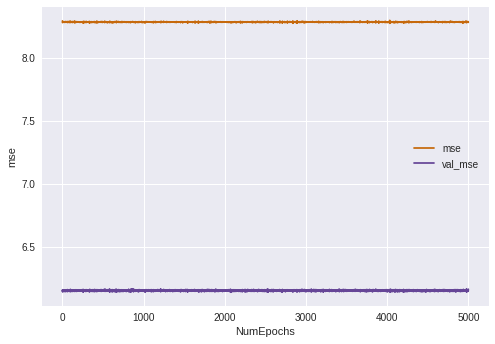

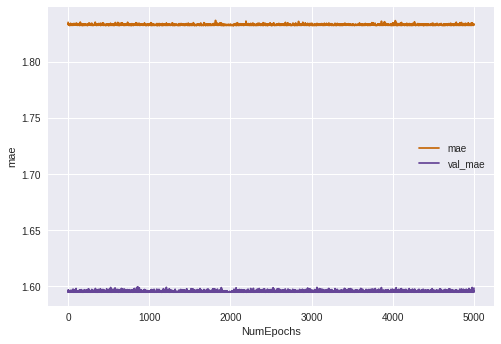

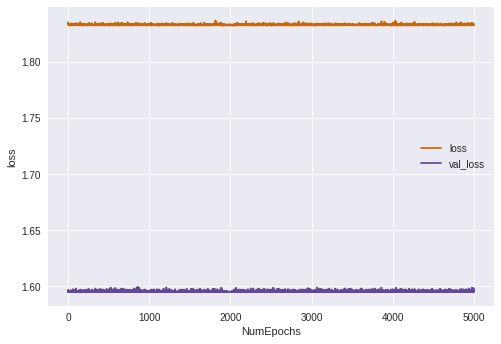

In [26]:
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')